In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew

In [ ]:
df = pd.read_excel('/content/WPP2022.xlsx',header=[1])#,header=[0,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20596 entries, 0 to 20595
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           20596 non-null  int64  
 1   Variant                                                                                         20596 non-null  object 
 2   Region, subregion, country or area *                                                            20596 non-null  object 
 3   Notes                                                                                           5475 non-null   object 
 4   Location code                                                                                   20596 non-null  int64  
 5   ISO3 Alpha-

In [ ]:
df.head(10)

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,580.75,498.04,240.316,271.625,208.192,378.697,430.259,324.931,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,566.728,490.199,231.177,258.09,203.78,368.319,415.836,319.336,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.91,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523.124,458.484,205.762,224.05,187.444,335.442,374.658,295.994,0,0
5,6,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,516.007,450.27,201.979,220.302,183.623,330.37,369.908,290.578,0,0
6,7,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,508.471,442.395,197.995,216.168,179.79,325.16,364.653,285.419,0,0
7,8,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,504.774,438.188,196.107,214.198,177.988,323.135,362.758,283.264,0,0
8,9,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,496.658,429.752,192.057,210.279,173.788,316.785,356.281,277.048,0,0
9,10,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,528.891,459.912,205.001,226.102,183.697,335.776,378.147,292.818,0,0


In [ ]:
df.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births

In [ ]:
df.drop(df.columns[[0,1,3,4,5,6,7,8,9,10]],inplace=True,axis=1)

In [ ]:
df.head()

,"Region, subregion, country or area *","Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,WORLD,2477674.732,2499322.157,1245362.965,1253959.192,19.166,99.314,22.224,43294.722,17.319,...,580.75,498.04,240.316,271.625,208.192,378.697,430.259,324.931,0,0
1,WORLD,2520969.582,2543130.38,1267473.182,1275657.198,19.502,99.358,22.172,44322.348,17.427,...,566.728,490.199,231.177,258.09,203.78,368.319,415.836,319.336,0,0
2,WORLD,2565291.179,2590270.899,1291399.982,1298870.917,19.864,99.425,22.108,49960.072,19.283,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.91,0,0
3,WORLD,2615250.618,2640278.797,1316659.222,1323619.574,20.247,99.474,22.036,50056.756,18.959,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0,0
4,WORLD,2665306.975,2691979.339,1342923.171,1349056.168,20.643,99.545,21.952,53345.249,19.812,...,523.124,458.484,205.762,224.05,187.444,335.442,374.658,295.994,0,0


In [ ]:
df[df.columns[0]].unique()

array(['WORLD', 'Sustainable Development Goal (SDG) regions',
       'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America',
       'UN development groups', 'More developed regions',
       'Less developed regions', 'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China',
       'Land-locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)',
       'World Bank income groups', 'High-income countries',
       'Middle-income countries', 'Upper-middle-income countries',
       'Lower-middle-income countries', 'Low-income countries',
       'No income group available', 'Geographic regions', 'AFRICA',
       'Eastern Africa', 'Burundi', 'Comoros'

In [ ]:
df.isnull().sum()

Region, subregion, country or area *                                                              0
Total Population, as of 1 January (thousands)                                                     0
Total Population, as of 1 July (thousands)                                                        0
Male Population, as of 1 July (thousands)                                                         0
Female Population, as of 1 July (thousands)                                                       0
Population Density, as of 1 July (persons per square km)                                          0
Population Sex Ratio, as of 1 July (males per 100 females)                                        0
Median Age, as of 1 July (years)                                                                  0
Natural Change, Births minus Deaths (thousands)                                                   0
Rate of Natural Change (per 1,000 population)                                                     0


In [ ]:
df.rename(columns = {'Life Expectancy at Birth, both sexes (years)':'Life_Expectancy'}, inplace = True)

In [ ]:
df.columns[:]

Index(['Region, subregion, country or area *',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births per woman)',
       'Net Reproduction Rate (surviving daughters per woman)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth

In [ ]:
df[
    'Life_Expectancy'
]

0        46.464
1        47.144
2        48.231
3        48.802
4        49.592
          ...  
20591    77.531
20592    77.861
20593    79.617
20594    78.764
20595     78.44
Name: Life_Expectancy, Length: 20596, dtype: object

In [ ]:
df[
    'Life_Expectancy'
] = pd.to_numeric(df[
    'Life_Expectancy'
])

ValueError: ignored

In [ ]:
df[
   'Life_Expectancy'
].iloc[72]

'...'

In [ ]:
df[
    'Life_Expectancy'
].unique()

array([46.464, 47.144, 48.231, ..., 77.861, 79.617, 78.764], dtype=object)

In [ ]:
indices = [i for i, x in enumerate(df[
    'Life_Expectancy'
].tolist()) if not isinstance(x, float)]

In [ ]:
len(indices)

97

In [ ]:
indices

[72,
 649,
 1154,
 1242,
 1340,
 1426,
 1587,
 1878,
 4759,
 4932,
 5122,
 6242,
 8085,
 8710,
 9477,
 9568,
 10666,
 12312,
 12748,
 12749,
 12750,
 12751,
 12752,
 12753,
 12754,
 12755,
 12756,
 12757,
 12758,
 12759,
 12760,
 12761,
 12762,
 12763,
 12764,
 12765,
 12766,
 12767,
 12768,
 12769,
 12770,
 12771,
 12772,
 12773,
 12774,
 12775,
 12776,
 12777,
 12778,
 12779,
 12780,
 12781,
 12782,
 12783,
 12784,
 12785,
 12786,
 12787,
 12788,
 12789,
 12790,
 12791,
 12792,
 12793,
 12794,
 12795,
 12796,
 12797,
 12798,
 12799,
 12800,
 12801,
 12802,
 12803,
 12804,
 12805,
 12806,
 12807,
 12808,
 12809,
 12810,
 12811,
 12812,
 12813,
 12814,
 12815,
 12816,
 12817,
 12818,
 12819,
 13954,
 16481,
 16504,
 17671,
 18724,
 19899,
 20184]

In [ ]:
df2 = df.drop(indices)

In [ ]:
df2.iloc[72]

Region, subregion, country or area *                                                              Sub-Saharan Africa
Total Population, as of 1 January (thousands)                                                             175662.711
Total Population, as of 1 July (thousands)                                                                177491.856
Male Population, as of 1 July (thousands)                                                                  88203.727
Female Population, as of 1 July (thousands)                                                                89288.129
Population Density, as of 1 July (persons per square km)                                                       8.118
Population Sex Ratio, as of 1 July (males per 100 females)                                                    98.786
Median Age, as of 1 July (years)                                                                              17.983
Natural Change, Births minus Deaths (thousands)                 

In [ ]:
df[ 'Life_Expectancy'].iloc[641]

78.29

In [ ]:
indices = [i for i, x in enumerate(df2[
    'Life_Expectancy'
].tolist()) if x == '...']

In [ ]:
indices

[]

In [ ]:
df2[
    'Life_Expectancy'
] = pd.to_numeric(df2[
    'Life_Expectancy'
])

In [ ]:
len(df2[
    'Life_Expectancy'
].unique())

16109

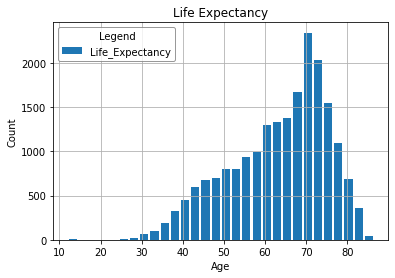

In [ ]:
df2[
    'Life_Expectancy'
].plot.hist(grid=True, bins=30, rwidth=0.8) 
plt.title('Life Expectancy') 
plt.ylabel('Count') 
plt.xlabel('Age')
plt.legend(facecolor='white', edgecolor='grey',
           loc='best', title='Legend', frameon=True, fontsize='medium')

In [ ]:
skew(df2['Life_Expectancy'])

-0.623971319989828

In [ ]:
df2.columns


Index(['Region, subregion, country or area *',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births per woman)',
       'Net Reproduction Rate (surviving daughters per woman)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth

In [ ]:


df2[
    'Total Population, as of 1 January (thousands)'
    'Total Population, as of 1 July (thousands)'
    ]
] = pd.to_numeric(df2[
    'Total Population, as of 1 January (thousands)',
    'Total Population, as of 1 July (thousands)'
    
])

TypeError: ignored

In [ ]:
df2[
    'Total Population, as of 1 July (thousands)'
    ]= pd.to_numeric(df2[
    'Total Population, as of 1 July (thousands)'
])

In [ ]:
df2[
    'Male Population, as of 1 July (thousands)'
    ]= pd.to_numeric(df2[
    'Male Population, as of 1 July (thousands)'
])

In [ ]:
df2[
    'Female Population, as of 1 July (thousands)'
    ]= pd.to_numeric(df2[
    'Female Population, as of 1 July (thousands)'
])

In [ ]:
df2[
    'Population Density, as of 1 July (persons per square km)'
    ]= pd.to_numeric(df2[
    'Population Density, as of 1 July (persons per square km)'
])

In [ ]:
df2[
    'Population Sex Ratio, as of 1 July (males per 100 females)'
    ]= pd.to_numeric(df2[
    'Population Sex Ratio, as of 1 July (males per 100 females)'
])

In [ ]:
df2[
    'Median Age, as of 1 July (years)'
    ]= pd.to_numeric(df2[
    'Median Age, as of 1 July (years)'
])

In [ ]:
df2[
    'Natural Change, Births minus Deaths (thousands)'
    ]= pd.to_numeric(df2[
    'Natural Change, Births minus Deaths (thousands)'
])

In [ ]:
df2[
    'Natural Change, Births minus Deaths (thousands)'
    ]= pd.to_numeric(df2[
    'Natural Change, Births minus Deaths (thousands)'
])

In [ ]:
df2[
    'Rate of Natural Change (per 1,000 population)'
    ]= pd.to_numeric(df2[
    'Rate of Natural Change (per 1,000 population)'
])

In [ ]:
df2[
    'Population Change (thousands)'
    ]= pd.to_numeric(df2[
    'Population Change (thousands)'
])

In [ ]:
df2[
    'Population Growth Rate (percentage)'
    ]= pd.to_numeric(df2[
    'Population Growth Rate (percentage)'
])

In [ ]:
df2[
    'Population Annual Doubling Time (years)'
    ]= pd.to_numeric(df2[
    'Population Annual Doubling Time (years)'
])

ValueError: ignored

In [ ]:
df2.columns

Index(['Region, subregion, country or area *',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births per woman)',
       'Net Reproduction Rate (surviving daughters per woman)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth

In [ ]:
# preprocess 
col = list(df.columns)[1:]

for y in col:
  indices = [i for i, x in enumerate(df2[
      y
  ].tolist()) if not isinstance(x, float)]
  df2.drop(indices,inplace=True,errors='ignore')

for x in col:
 df2[
    x
] = pd.to_numeric(df2[
    x
])

ValueError: ignored

In [ ]:
df2[
    'Mean Age Childbearing (years)'
] = pd.to_numeric(df2[
    'Mean Age Childbearing (years)'
])

In [ ]:
df2.corr()

,Mean Age Childbearing (years),Life_Expectancy
Mean Age Childbearing (years),1.000000,-0.272303
Life_Expectancy,-0.272303,1.000000


In [ ]:
df2.columns

Index(['Region, subregion, country or area *',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births per woman)',
       'Net Reproduction Rate (surviving daughters per woman)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth

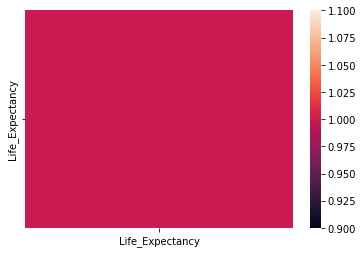

In [ ]:
sns.heatmap(df2.corr())

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df2.corr()[['Mortality','Life_Expectancy']].sort_values(by='Life_Expectancy', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16);

KeyError: ignored

<Figure size 576x864 with 0 Axes>